Need to restart the kernal to run each pollutants

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from glob import glob

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential
from utils import * 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

plt.rcParams['savefig.dpi'] = 400
plt.rcParams['font.size'] = 13
plt.rcParams["legend.frameon"] = False

In [2]:
data_raw = pd.read_csv('datacopy.csv')
data = np.array(data_raw)

In [3]:
len(data)

8760

# Neuron Network_PM2.5

## 1. preprocessing the data

In [22]:
X_train_df = data[0:int(len(data)*0.8),8:12]
y_train_df = data[0:int(len(data)*0.8),1]

X_test_df = data[int(len(data)*0.8):int(len(data)),8:12]
y_test_df = data[int(len(data)*0.8):int(len(data)),1]


In [23]:
X_test_df.shape

(1752, 4)

In [24]:
# Standardization
mean, std = X_train_df.mean(), X_train_df.std()

X_train_df   = (X_train_df - mean)/std
X_test_df    = (X_test_df - mean)/std

X_train = X_train_df
y_train = y_train_df
X_test = X_test_df

print(X_train.shape,y_train.shape)

(7008, 4) (7008,)


## 2. Build the model

In [25]:
# set hyperparameters
n_neuron       = 64
activation     = 'relu'
num_epochs     = 100
learning_rate  = 0.01
minibatch_size = 32
model_num      = 1

In [26]:
model = Sequential()

model.add(Dense(n_neuron,  activation=activation,input_shape=(X_train.shape[1],))) #  the 1st hidden layer 
model.add(Dense(n_neuron,  activation=activation)) # the 2nd hidden layer
model.add(Dense(n_neuron,  activation=activation)) # the 3rd hidden layer
model.add(Dense(y_train.shape[0],  activation='linear')) # the output layer

model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))

## 3. Train the model

In [27]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)


history = model.fit(X_train, y_train, 
                    batch_size      = minibatch_size,
                    epochs          = num_epochs,
                    validation_split= 0.2, 
                    verbose         = 1,
                    callbacks       = [early_stop])

Epoch 1/100
176/176 [==============================] - 1s 3ms/step - loss: 97.0198 - val_loss: 63.2011
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 89.2533 - val_loss: 53.4409
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 88.9520 - val_loss: 57.2476
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 88.8641 - val_loss: 55.0725
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 86.9648 - val_loss: 53.8254
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 87.9794 - val_loss: 67.7815
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 88.5507 - val_loss: 63.8138
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 86.9161 - val_loss: 59.2545
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 87.8990 - val_loss: 57.6298
Epoch 10/100
176/176 [==============================] - 0s 3ms/step - los

In [28]:
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Val loss')
    plt.legend()
    #plt.ylim([0, 5])

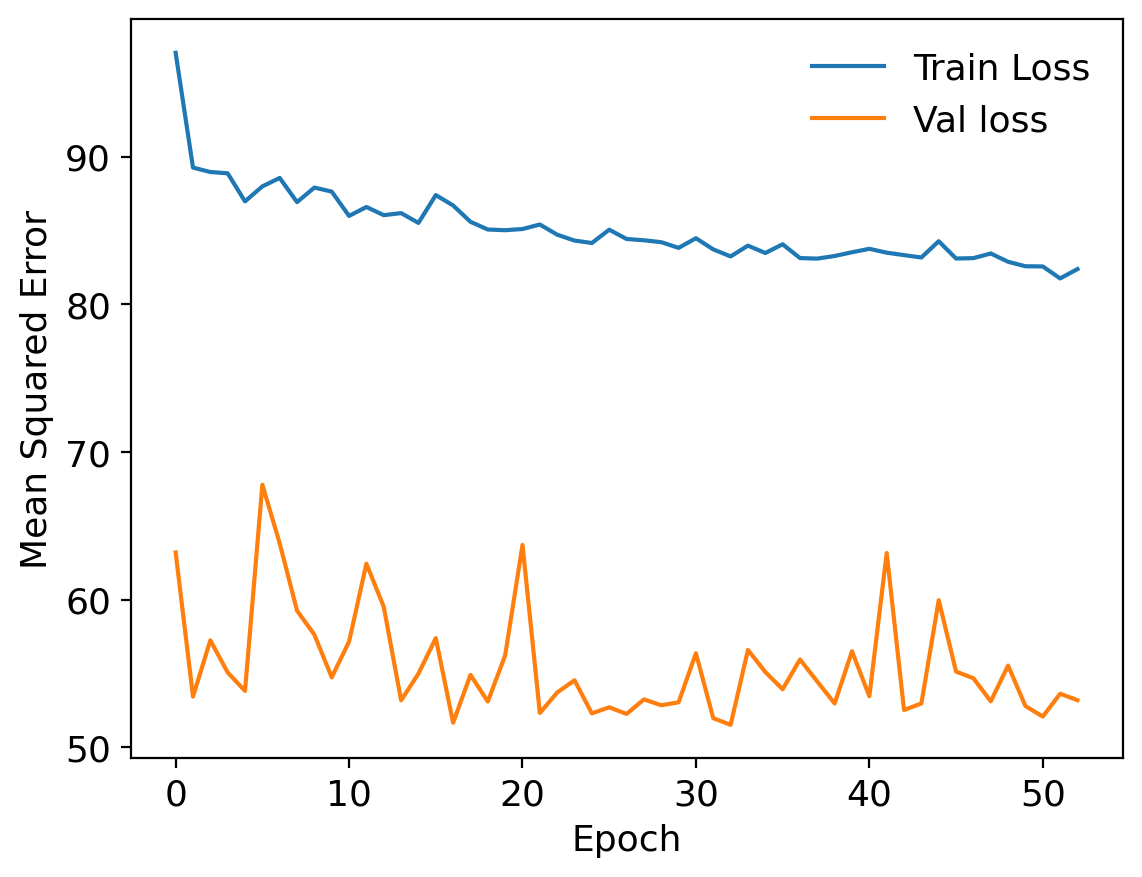

In [29]:
plot_history(history)

# NOx prediction

## 1. Data preprocessing

In [4]:
X_train_df = data[0:int(len(data)*0.8),8:12]
y_train_df = data[0:int(len(data)*0.8),2]

X_test_df = data[int(len(data)*0.8):int(len(data)),8:12]
y_test_df = data[int(len(data)*0.8):int(len(data)),2]


In [5]:
# Standardization
mean, std = X_train_df.mean(), X_train_df.std()

X_train_df   = (X_train_df - mean)/std
X_test_df    = (X_test_df - mean)/std

X_train = X_train_df
y_train = y_train_df
X_test = X_test_df

print(X_train.shape,y_train.shape)

(7008, 4) (7008,)


## 2. Build the model

In [6]:
# set hyperparameters
n_neuron       = 64
activation     = 'relu'
num_epochs     = 100
learning_rate  = 0.01
minibatch_size = 32
model_num      = 1

In [7]:
model = Sequential()

model.add(Dense(n_neuron,  activation=activation,input_shape=(X_train.shape[1],))) #  the 1st hidden layer 
model.add(Dense(n_neuron,  activation=activation)) # the 2nd hidden layer
model.add(Dense(n_neuron,  activation=activation)) # the 3rd hidden layer
model.add(Dense(y_train.shape[0],  activation='linear')) # the output layer

model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))

2022-12-22 11:47:29.923157: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 3. Train the model

In [8]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)


history = model.fit(X_train, y_train, 
                    batch_size      = minibatch_size,
                    epochs          = num_epochs,
                    validation_split= 0.2, 
                    verbose         = 1,
                    callbacks       = [early_stop])

Epoch 1/100
176/176 [==============================] - 1s 3ms/step - loss: 196.1194 - val_loss: 219.6738
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 165.6421 - val_loss: 195.5741
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 166.0916 - val_loss: 197.2453
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 165.0617 - val_loss: 204.3543
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 160.3444 - val_loss: 203.5220
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 160.4037 - val_loss: 185.2975
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 155.5885 - val_loss: 228.0037
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 152.6757 - val_loss: 167.7277
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 151.0410 - val_loss: 200.0294
Epoch 10/100
176/176 [==============================] -

In [9]:
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Val loss')
    plt.legend()
    #plt.ylim([0, 5])

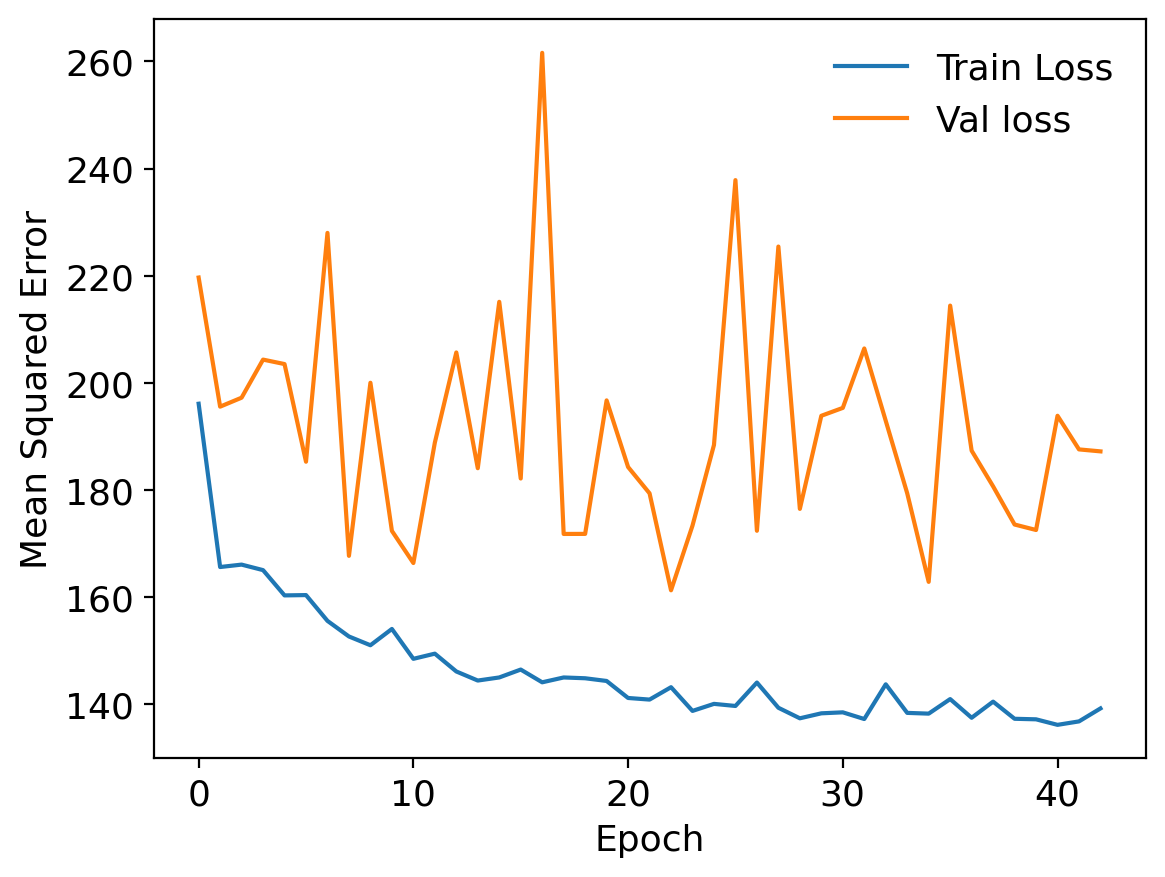

In [10]:
plot_history(history)

# NN_SO2

## 1. Data preprocessing

In [3]:
X_train_df = data[0:int(len(data)*0.8),8:12]
y_train_df = data[0:int(len(data)*0.8),3]

X_test_df = data[int(len(data)*0.8):int(len(data)),8:12]
y_test_df = data[int(len(data)*0.8):int(len(data)),3]


In [4]:
# Standardization
mean, std = X_train_df.mean(), X_train_df.std()

X_train_df   = (X_train_df - mean)/std
X_test_df    = (X_test_df - mean)/std

X_train = X_train_df
y_train = y_train_df
X_test = X_test_df

print(X_train.shape,y_train.shape)

(7008, 4) (7008,)


## 2. Build the model

In [5]:
# set hyperparameters
n_neuron       = 64
activation     = 'relu'
num_epochs     = 100
learning_rate  = 0.01
minibatch_size = 32
model_num      = 1

In [6]:
model = Sequential()

model.add(Dense(n_neuron,  activation=activation,input_shape=(X_train.shape[1],))) #  the 1st hidden layer 
model.add(Dense(n_neuron,  activation=activation)) # the 2nd hidden layer
model.add(Dense(n_neuron,  activation=activation)) # the 3rd hidden layer
model.add(Dense(y_train.shape[0],  activation='linear')) # the output layer

model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))

2022-12-22 11:48:24.502735: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 3. Train the model

In [7]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)


history = model.fit(X_train, y_train, 
                    batch_size      = minibatch_size,
                    epochs          = num_epochs,
                    validation_split= 0.2, 
                    verbose         = 1,
                    callbacks       = [early_stop])

Epoch 1/100
176/176 [==============================] - 1s 3ms/step - loss: 0.9405 - val_loss: 1.3495
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.8628 - val_loss: 1.7417
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.8608 - val_loss: 1.5053
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 0.8482 - val_loss: 1.2832
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.8508 - val_loss: 1.2518
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 0.8222 - val_loss: 1.2725
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 0.8307 - val_loss: 1.3068
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.8316 - val_loss: 1.3503
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 0.8097 - val_loss: 1.3376
Epoch 10/100
176/176 [==============================] - 0s 3ms/step - loss: 0.8160 - val_lo

In [8]:
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Val loss')
    plt.legend()
    #plt.ylim([0, 5])

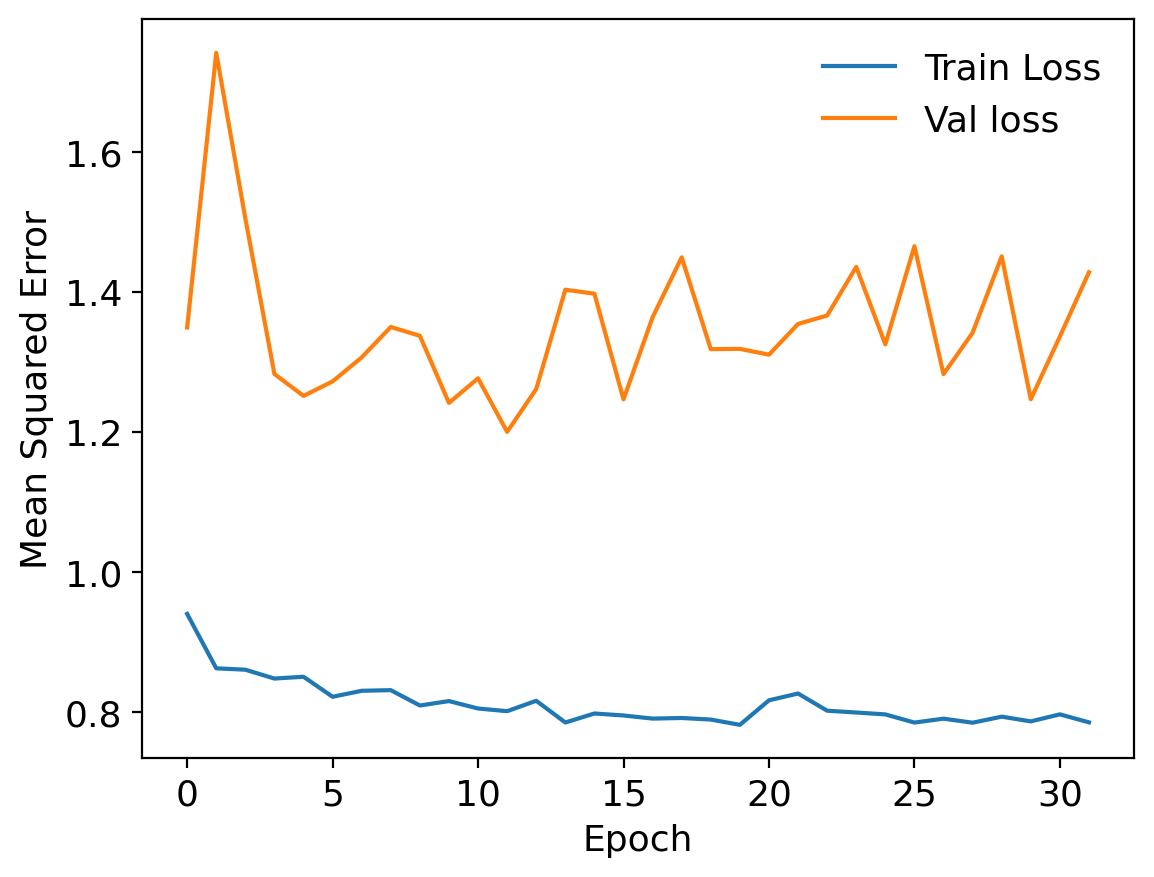

In [9]:
plot_history(history)